# 🛒 Walmart Sales Forecasting

This notebook explores and analyzes weekly sales data from Walmart stores across the country.
## 📌 Objective

- Understand trends, seasonality, and patterns in weekly sales
- Analyze the impact of external factors like temperature, fuel price, CPI, and unemployment
- Identify top/worst performing stores
- Prepare the data for forecasting sales for the next 12 weeks

📅 Data covers multiple stores over time with weekly granularity.

walmart project

a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

 b. If the weekly sales show a seasonal trend, when and what could be the reason?

 c. Does temperature affect the weekly sales in any manner?

 d. How is the Consumer Price index affecting the weekly sales of various stores?

 e. Top performing stores according to the historical data.

 f.The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/content/Walmart.csv')

In [5]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [6]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
num_col=df.select_dtypes(include=np.number).columns

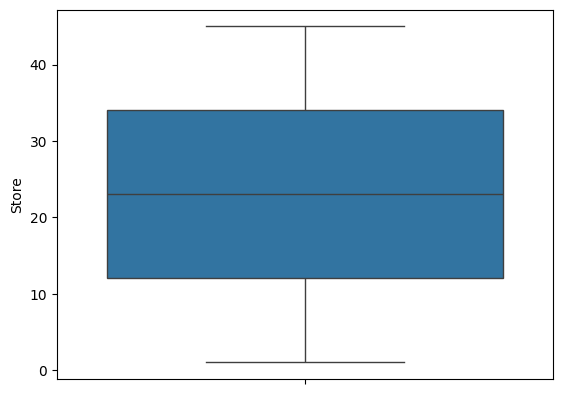

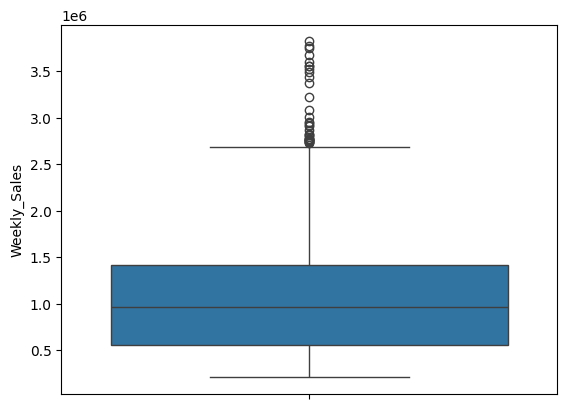

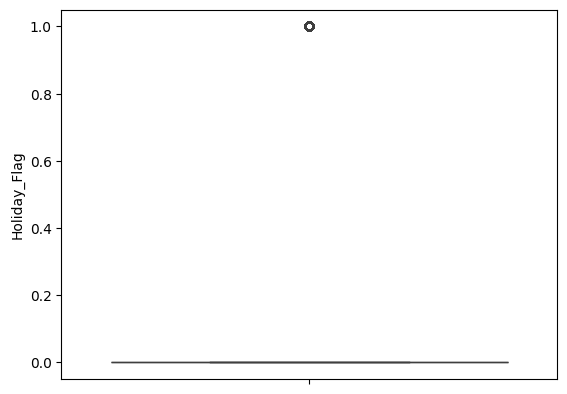

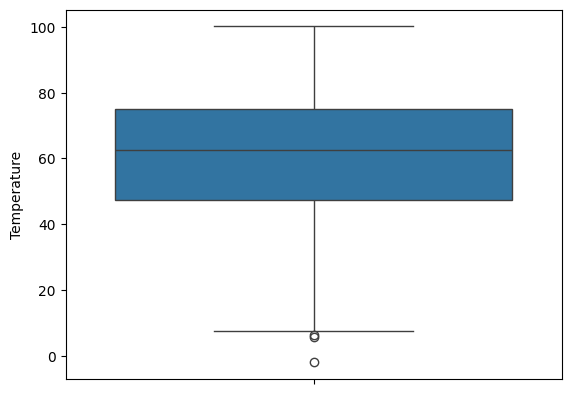

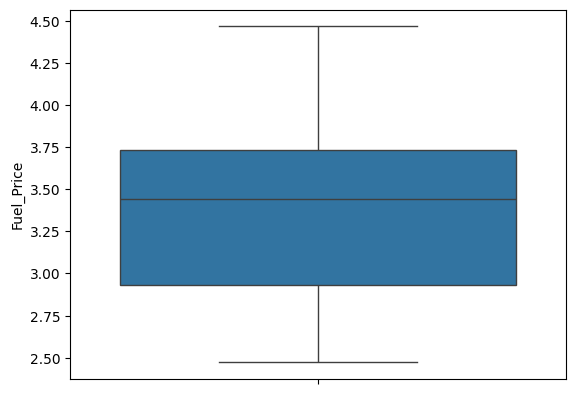

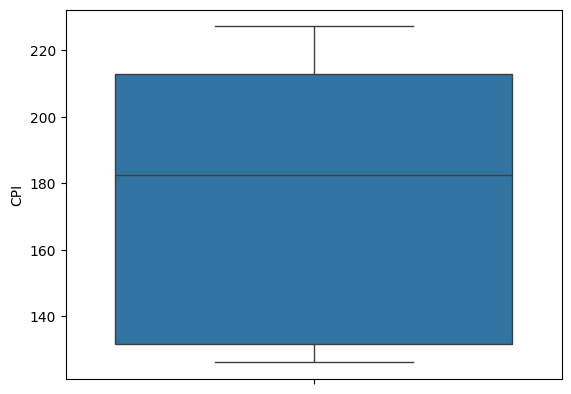

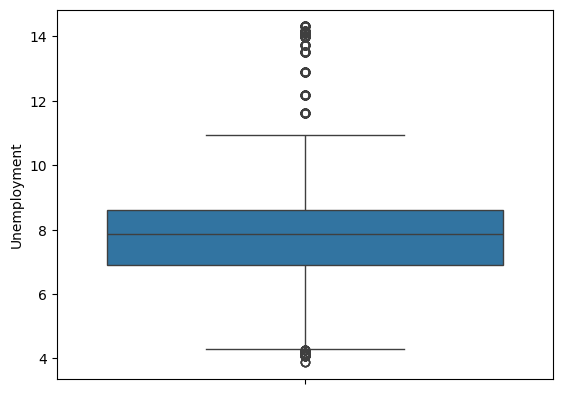

In [9]:
for i in num_col:
  sns.boxplot(df[i])
  plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [11]:
def remove_outliers(df,column):
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  iqr=q3-q1
  lb=q1-1.5*iqr
  ub=q3+1.5*iqr
  df=df[(df[column]>= lb)&(df[column]<= ub)]
  return df

In [12]:
for col in df.columns:
  if df[col].dtype in [np.int64, np.float64]:
    df = remove_outliers(df, col)

In [13]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [14]:
corr=df['Weekly_Sales'].corr(df['Unemployment'])
corr

np.float64(-0.07373058571012253)

In [15]:
store_unemployment=df.groupby('Store')[['Weekly_Sales','Unemployment']].mean().reset_index()

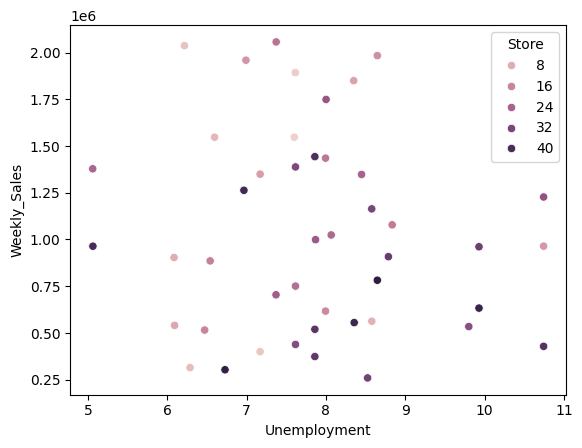

In [16]:
sns.scatterplot(data=store_unemployment,x='Unemployment',y='Weekly_Sales',hue='Store')
plt.show()

If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

yes these stores are affected most

store no=
33,38,44,36,5,29,3,30,43,7

In [17]:
store_unemployment['Sales_Unemployment_Ratio'] = store_unemployment['Weekly_Sales'] / store_unemployment['Unemployment']

suffering_stores = store_unemployment.sort_values(by='Sales_Unemployment_Ratio').head(10)
suffering_stores


,Store,Weekly_Sales,Unemployment,Sales_Unemployment_Ratio
32,33,259656.216316,8.525850,30455.171949
37,38,428569.004375,10.744250,39888.219687
43,44,303253.622782,6.728797,45068.029712
35,36,373953.448647,7.861180,47569.630410
4,5,314892.276917,6.288241,50076.372212
28,29,534375.755038,9.801143,54521.780044
2,3,400064.846391,7.171338,55786.636622
29,30,438708.962782,7.617120,57595.120657
42,43,633127.613759,9.929677,63761.150883
6,7,562766.177557,8.578527,65601.728139


In [18]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [19]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [20]:
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df['Week']=df['Date'].dt.isocalendar().week

In [21]:
weekly_sales=df.groupby('Week')['Weekly_Sales'].mean().reset_index()

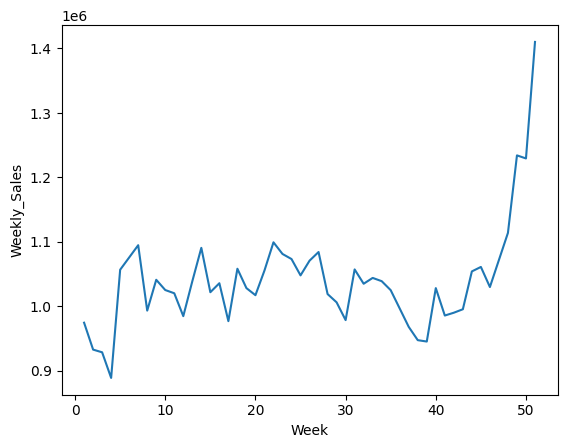

In [22]:
sns.lineplot(data=weekly_sales,x='Week',y='Weekly_Sales')
plt.show()

 b. If the weekly sales show a seasonal trend, when and what could be the reason?


In [23]:
#mostly weekly sales doesnt show seasonal trend but for peak reasons maybe:

# peaks around week 50-52, this could be due to the holiday season (Christmas and New Year).
# back to school days
# summer holidays
# specific festivals

In [24]:
#c. Does temperature affect the weekly sales in any manner?
# no

In [25]:
corr=df['Weekly_Sales'].corr(df['Temperature'])
corr

np.float64(-0.039398814829588555)

In [26]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,9
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,3,2010,10
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,39
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,40
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,41
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,42


In [27]:
#d. How is the Consumer Price index affecting the weekly sales of various stores?
#its not affecting

In [28]:
corr=df['Weekly_Sales'].corr(df['CPI'])
corr

np.float64(-0.08413605779591227)

In [29]:
#Top performing stores according to the historical data.
#top performing stores are=20,14,13,2,10.

In [30]:
top_store=df.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [31]:
(top_store.sort_values(by='Weekly_Sales',ascending=False)).head()

,Store,Weekly_Sales
19,20,2.632513e+08
13,14,2.578435e+08
12,13,2.527026e+08
1,2,2.479294e+08
9,10,2.404315e+08


In [32]:
worst_store=top_store.sort_values(by='Weekly_Sales',ascending=False).tail()

In [33]:
worst_store

,Store,Weekly_Sales
43,44,40332731.83
32,33,34534276.77
27,28,19637073.81
11,12,15431564.75
37,38,6857104.07


In [34]:
best_performing_store = top_store.iloc[0]
worst_performing_store = top_store.iloc[-1]
difference_in_sales = best_performing_store['Weekly_Sales'] - worst_performing_store['Weekly_Sales']

In [35]:
difference_in_sales

np.float64(101712927.99999999)

In [36]:
ratio = difference_in_sales / worst_performing_store['Weekly_Sales']
print(ratio)

0.977704290256195


In [37]:
#f.The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [38]:
#The worst performing store=44
#difference_in_sales=101712927.99999999

In [39]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,9
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,3,2010,10
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,39
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,40
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,41
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,42


In [40]:
top=df[df['Date']=='2012-10-26']

In [41]:
top

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week
142,1,2012-10-26,1493659.74,0,69.16,3.506,223.444251,6.573,10,2012,43
285,2,2012-10-26,1834458.35,0,69.79,3.506,223.078337,6.170,10,2012,43
428,3,2012-10-26,405432.70,0,74.66,3.506,226.987364,6.034,10,2012,43
714,5,2012-10-26,319550.77,0,71.70,3.506,224.037814,5.422,10,2012,43
857,6,2012-10-26,1431426.34,0,72.34,3.506,225.068625,5.329,10,2012,43
1000,7,2012-10-26,495543.28,0,42.53,3.686,199.219532,7.557,10,2012,43
1143,8,2012-10-26,891671.44,0,64.74,3.506,227.036936,5.124,10,2012,43
1286,9,2012-10-26,549731.49,0,69.52,3.506,227.232807,4.954,10,2012,43
1429,10,2012-10-26,1744349.05,0,70.50,4.301,131.193097,6.943,10,2012,43
1572,11,2012-10-26,1200729.45,0,74.26,3.506,226.987364,6.034,10,2012,43


In [42]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,9
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,3,2010,10
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,39
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,40
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,41
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,42


In [43]:
df1=df.groupby('Date')['Weekly_Sales'].mean().reset_index()

In [44]:
df1

,Date,Weekly_Sales
0,2010-02-05,1.109996e+06
1,2010-02-19,1.080072e+06
2,2010-02-26,9.772276e+05
3,2010-03-05,1.043185e+06
4,2010-03-12,1.030260e+06
...,...,...
128,2012-09-28,9.397297e+05
129,2012-10-05,1.019597e+06
130,2012-10-12,9.904771e+05
131,2012-10-19,9.700909e+05


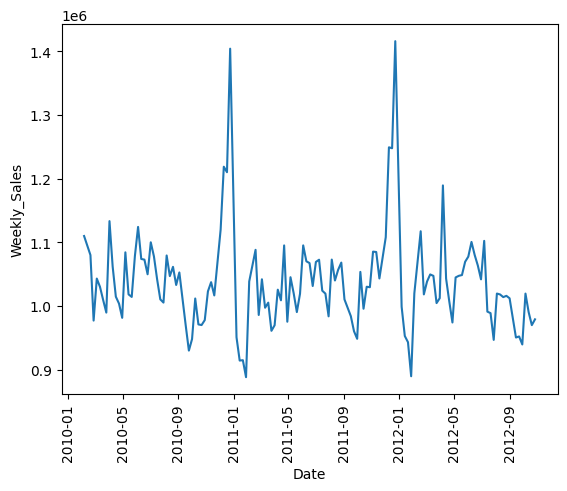

In [45]:
sns.lineplot(data=df1,x='Date',y='Weekly_Sales')
plt.xticks(rotation=90)
plt.show()

PROPHET BUILDING

In [46]:
df1.columns=['ds','y']

In [47]:
from prophet import Prophet

In [48]:
model=Prophet()

In [49]:
model.fit(df1)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [50]:
future=model.make_future_dataframe(periods=365)

In [51]:
forecast=model.predict(future)

In [52]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [53]:
f=forecast[['ds','yhat','yhat_lower','yhat_upper']]

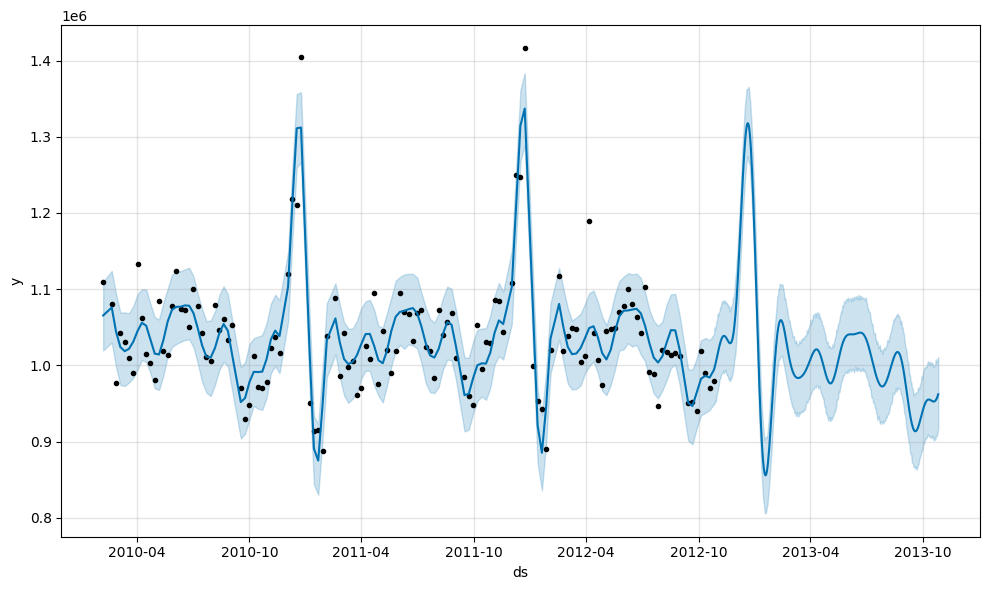

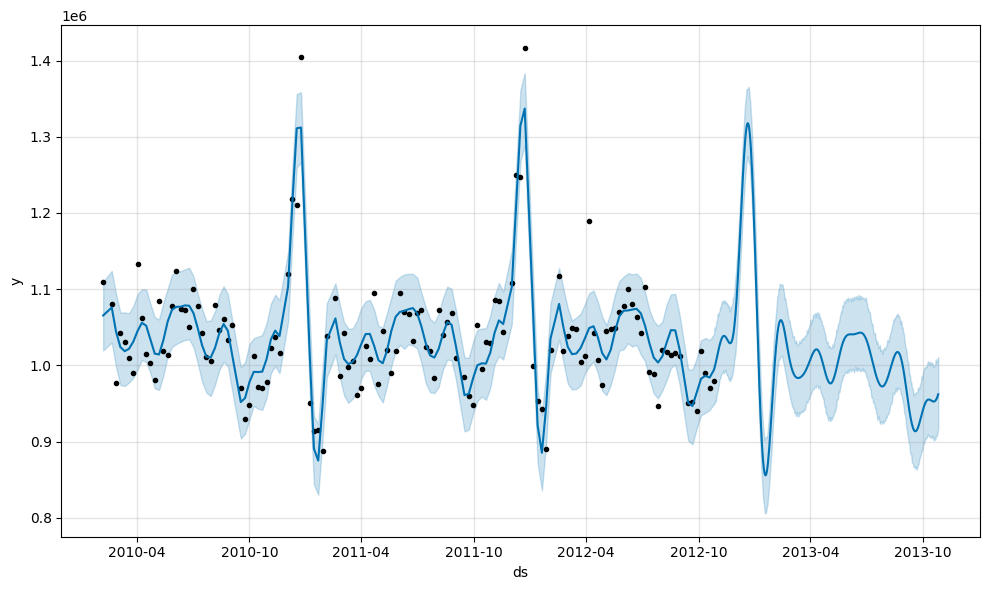

In [54]:
model.plot(f)

In [55]:
df1

,ds,y
0,2010-02-05,1.109996e+06
1,2010-02-19,1.080072e+06
2,2010-02-26,9.772276e+05
3,2010-03-05,1.043185e+06
4,2010-03-12,1.030260e+06
...,...,...
128,2012-09-28,9.397297e+05
129,2012-10-05,1.019597e+06
130,2012-10-12,9.904771e+05
131,2012-10-19,9.700909e+05


ARIMA AND SARIMA BUILDING

In [56]:
df=pd.read_csv('/content/Walmart.csv')

In [57]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [58]:
df.duplicated().sum()

np.int64(0)

In [59]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [60]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [61]:
df1=df.groupby('Date')['Weekly_Sales'].mean().reset_index()

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          143 non-null    object 
 1   Weekly_Sales  143 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [63]:
df1['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          143 non-null    datetime64[ns]
 1   Weekly_Sales  143 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [65]:
df1.set_index('Date',inplace=True)

In [66]:
df1

,Weekly_Sales
Date,
2010-02-05,9.657554e+05
2010-02-12,1.072926e+06
2010-02-19,1.057300e+06
2010-02-26,9.386639e+05
2010-03-05,1.041356e+06
...,...
2012-09-28,9.917859e+05
2012-10-05,9.376851e+05
2012-10-12,1.023166e+06


In [67]:
df1.duplicated().sum()

np.int64(0)

In [68]:
df1.isnull().sum()

,0
Weekly_Sales,0


In [69]:
from statsmodels.tsa.stattools import adfuller

In [70]:
result=adfuller(df1)

In [71]:
p_val=result[1]

In [72]:
p_val

np.float64(0.08200123056783465)

In [73]:
#null hypothesis =data is not stationary
#alternate hypothesis =data is stationary

In [74]:
if p_val<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Accept Null Hypothesis


<Axes: xlabel='Date'>

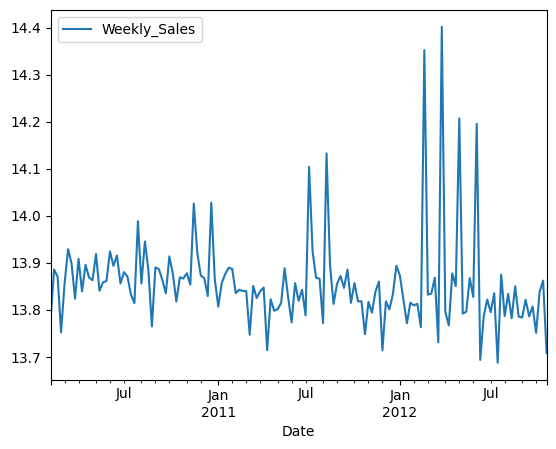

In [75]:
first_log=np.log(df1)
first_log=first_log.dropna()
first_log.plot()

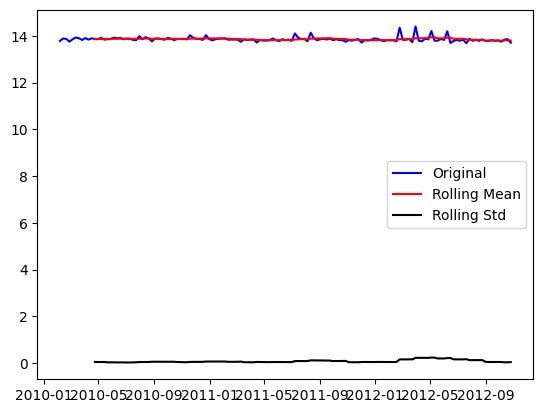

In [76]:
mean_log=first_log.rolling(window=12).mean()
std_log=first_log.rolling(window=12).std()
plt.plot(first_log,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling Std')
plt.legend(loc='best')

In [77]:
new_data=first_log-mean_log
new_data.dropna(inplace=True)
new_data.head(20)

,Weekly_Sales
Date,
2010-04-23,0.009996
2010-04-30,-0.003036
2010-05-07,0.050131
2010-05-14,-0.025572
2010-05-21,-0.016666
2010-05-28,-0.014080
2010-06-04,0.049309
2010-06-11,0.018736
2010-06-18,0.033326


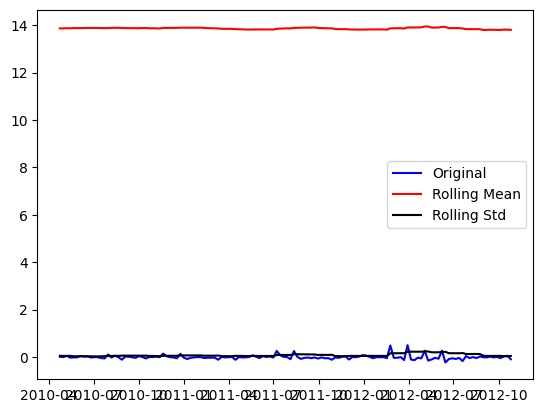

In [78]:
plt.plot(new_data,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling Std')
plt.legend(loc='best')

In [79]:
new_data

,Weekly_Sales
Date,
2010-04-23,0.009996
2010-04-30,-0.003036
2010-05-07,0.050131
2010-05-14,-0.025572
2010-05-21,-0.016666
...,...
2012-09-28,0.004168
2012-10-05,-0.044895
2012-10-12,0.029786


In [80]:
train=new_data.iloc[:104]['Weekly_Sales']
test=new_data.iloc[104:]['Weekly_Sales']

In [81]:
from statsmodels.tsa.arima.model import ARIMA

In [82]:
import itertools
p=range(0,12)
d=range(0,2)
q=range(0,12)

In [83]:
pdq=list(itertools.product(p,d,q))
rmse=[]
order1=[]

In [84]:
from sklearn.metrics import mean_squared_error
for i in pdq:
  model=ARIMA(train,order=i)
  model_fit=model.fit()
  pred=model_fit.predict(start=len(train),end=len(train)+len(test)-1)
  error=np.sqrt(mean_squared_error(test,pred))
  rmse.append(error)
  order1.append(i)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

In [85]:
results=pd.DataFrame(index = order1,data=rmse,columns=['RMSE'])
results

,RMSE
"(0, 0, 0)",0.105461
"(0, 0, 1)",0.105879
"(0, 0, 2)",0.105939
"(0, 0, 3)",0.109200
"(0, 0, 4)",0.109518
...,...
"(11, 1, 7)",0.108902
"(11, 1, 8)",0.105794
"(11, 1, 9)",0.119521
"(11, 1, 10)",0.116409


In [86]:
model=ARIMA(train,order=(0,0,0))
model_fit=model.fit()
pred=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

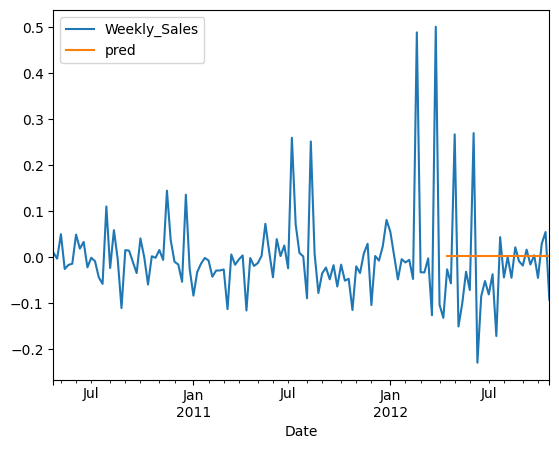

In [87]:
new_data['pred'] = pred
new_data[['Weekly_Sales','pred']].plot()

In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [89]:
model=SARIMAX(train,order=(0,0,0),seasonal_order=(0,0,0,12))
model_fit=model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

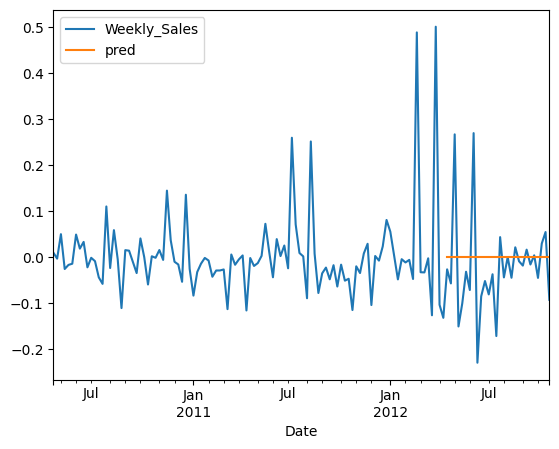

In [90]:
new_data['pred'] = model_fit.predict(start=len(train),end=len(train)+len(test)-1)
new_data[['Weekly_Sales','pred']].plot()

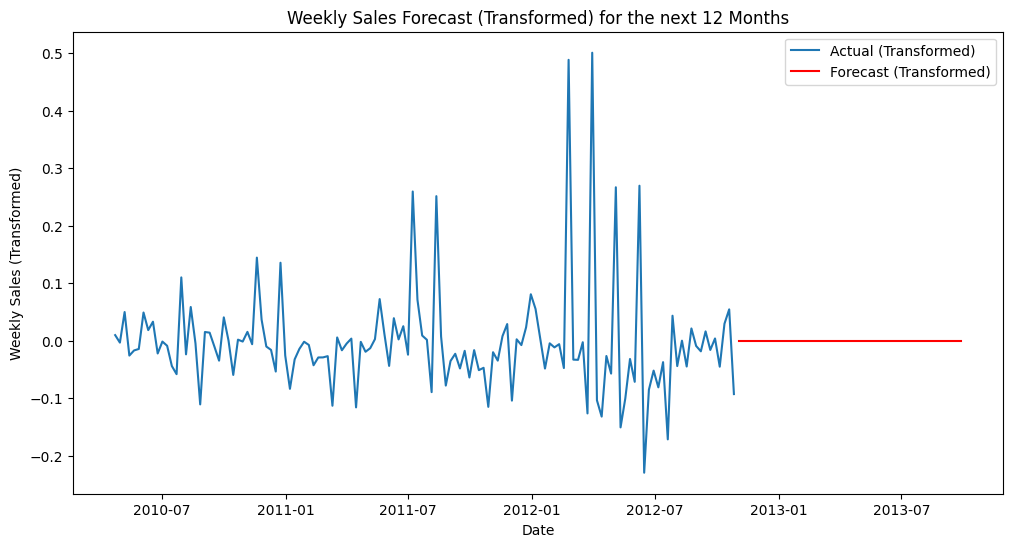

In [91]:

future_periods = 12  # Forecast for 12 months

last_date = new_data.index[-1]
forecast_start_date = last_date + pd.DateOffset(weeks=1)
forecast_end_date = last_date + pd.DateOffset(weeks=12*4)
forecast_results = model_fit.predict(start=forecast_start_date, end=forecast_end_date)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(new_data.index, new_data['Weekly_Sales'], label='Actual (Transformed)')
plt.plot(forecast_results.index, forecast_results, label='Forecast (Transformed)', color='red')
plt.title(f'Weekly Sales Forecast (Transformed) for the next {future_periods} Months')
plt.xlabel('Date')
plt.ylabel('Weekly Sales (Transformed)')
plt.legend()
plt.show()


<Axes: >

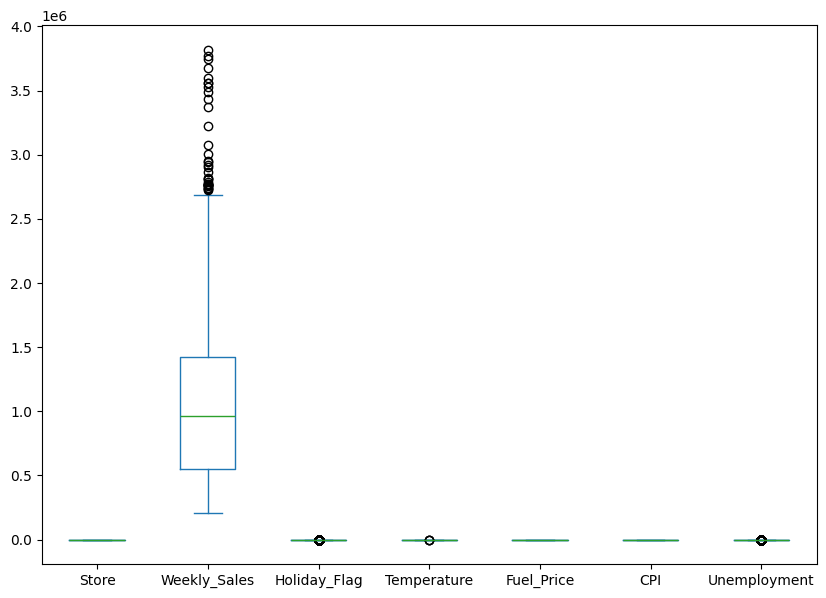

In [93]:
df.plot(kind='box', figsize=(10,7))

In [94]:
# Using IQR method to filter outliers of selected columns
for col in ['Weekly_Sales', 'Temperature']: #didnt choose Holiday_Flag as it will remove all the 1s
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5 * iqr
    ll = q1 - 1.5 * iqr
    df = df[(df[col] >= ll) & (df[col] <= ul)]

In [95]:
df.duplicated().sum() #checking for duplicate rows

np.int64(0)

## Data Analisis


-We have stores numbered from 1-45.
- We'll focus on forecast of  sales one of these stores.
- I will choose store number 15 because I was born on 15th september (no rule says I cant do that😶‍🌫️).

**BONUS**
3. Prophet model

smol intro:

Prophet is an easy-to-use forecasting model by Facebook which handles seasonality automatically.

In [100]:
%pip install cmdstanpy

In [101]:
%pip install prophet

In [96]:
df15 = df.loc[df['Store'] == 15] #slicing to get only data of Store september 15
df15

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2002,15,05-02-2010,652122.44,0,19.83,2.954,131.527903,8.350
2003,15,12-02-2010,682447.10,1,22.00,2.940,131.586613,8.350
2004,15,19-02-2010,660838.75,0,27.54,2.909,131.637000,8.350
2005,15,26-02-2010,564883.20,0,29.87,2.910,131.686000,8.350
2006,15,05-03-2010,605325.43,0,31.79,2.919,131.735000,8.350
...,...,...,...,...,...,...,...,...
2140,15,28-09-2012,553901.97,0,57.13,4.158,138.739500,8.193
2141,15,05-10-2012,573498.64,0,59.57,4.151,138.825600,7.992
2142,15,12-10-2012,551799.63,0,49.12,4.186,138.911700,7.992
2143,15,19-10-2012,555652.77,0,52.89,4.153,138.833613,7.992


In [92]:
# conclusion:After evaluating all models the good accuracy of prediction is given by prophet